In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive
from matplotlib.pyplot import figure

In [7]:

#Importing csv file
url = "https://raw.githubusercontent.com/ynoh253/Heart/ee89febfa51796882b06f9d995f02d3e8c0a2bd4/heart_disease_prediction.csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [8]:
df.head()
#sex             1 = male, 0= female
#Chest Pain Type -- Value 1: typical angina
#                -- Value 2: atypical angina
#                -- Value 3: non-anginal pain
#                -- Value 4: asymptomatic
#Fasting Blood sugar(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#higher than 120 indicates diabetes
#Resting electrocardiogram results -- Value 0: normal
#(testing heart beat rate)         -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#                                  -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
#Exercise induced angina.          1 = yes; 0 = no
#the slope of the peak exercise ST segment.  -- Value 1: upsloping
#                                            -- Value 2: flat
#                                            -- Value 3: downsloping
#class              1 = heart disease, 0 = Normal

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


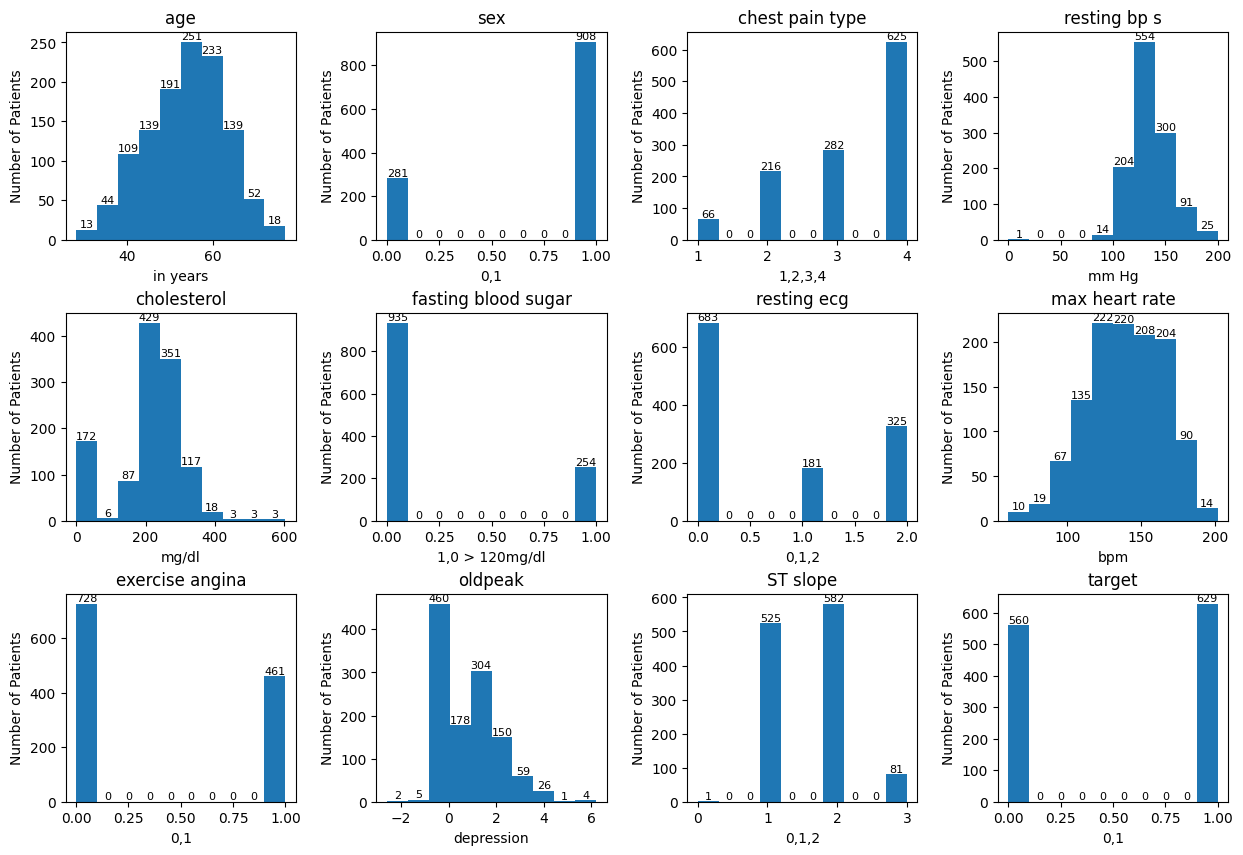

In [9]:
#Plotting
fig = figure(num=None, figsize=(15, 10))
#fig.tight_layout(h_pad=5)

xlabel = ['in years','0,1','1,2,3,4','mm Hg','mg/dl','1,0 > 120mg/dl','0,1,2','bpm','0,1','depression','0,1,2','0,1']
for i in range(1, 13):
  plt.subplot(3,4,i)
  x = df.iloc[0:-1, i-1]
  plt.title(df.columns[i-1])
  plt.xlabel(xlabel[i-1])
  plt.ylabel('Number of Patients')
  values, bins, bars = plt.hist(x)
  plt.bar_label(bars, fontsize=8)
plt.subplots_adjust(wspace=0.35, hspace=0.35)

In [10]:
df.dtypes

,0
age,int64
sex,int64
chest pain type,int64
resting bp s,int64
cholesterol,int64
fasting blood sugar,int64
resting ecg,int64
max heart rate,int64
exercise angina,int64
oldpeak,float64


Categorical variables >> from integer to object & one-hot encoding (nominal)

sex, chest pain type, fasting blood sugar, resting ecg, exercise angina, ST slope, target



Need One-Hot Encoding: cp, restecg

Don't Need One-Hot Encoding: sex, fbs, exang, slope, ca --> binary

In [11]:
from sklearn.preprocessing import OneHotEncoder

categorical_nominal = ["chest pain type", "resting ecg"]

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[categorical_nominal])

#one_hot_df = pd.DataFrame(one_hot_encoded)
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_nominal))


df_encoded = pd.concat([df, one_hot_df], axis=1)

df_encoded = df_encoded.drop(categorical_nominal, axis=1)

df_encoded.head()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,ST slope,target,chest pain type_1,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg_0,resting ecg_1,resting ecg_2
0,40,1,140,289,0,172,0,0.0,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,49,0,160,180,0,156,0,1.0,2,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,37,1,130,283,0,98,0,0.0,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,48,0,138,214,0,108,1,1.5,2,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,54,1,150,195,0,122,0,0.0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [12]:
from sklearn.model_selection import train_test_split
no_target = df_encoded.drop('target', axis=1)
data = no_target.to_numpy()
target = df_encoded['target'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

print(data.shape, target.shape)
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


(1190, 16) (1190,)
(952, 16) (238, 16) (952,) (238,)


In [13]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000, max_iter= 10)

lr.fit(train_scaled, train_target)

print(lr.coef_, lr.intercept_)

[[ 0.24652463  0.53907487  0.05376736 -0.23734016  0.3461845  -0.29525485
   0.45454616  0.3439456   0.76764304 -0.15518972 -0.34232675 -0.1981212
   0.50437932  0.0144875  -0.07085738  0.0409106 ]] [0.17084178]


In [14]:
print(lr.predict_proba(train_scaled[:5]))

[[0.10554268 0.89445732]
 [0.95704648 0.04295352]
 [0.32098966 0.67901034]
 [0.3114154  0.6885846 ]
 [0.90831479 0.09168521]]


In [15]:
from scipy.special import expit
z_scores = lr.decision_function(train_scaled)
print(expit(z_scores[:5]))

[0.89445732 0.04295352 0.67901034 0.6885846  0.09168521]


In [16]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.8277310924369747
0.8445378151260504


In [17]:
#Random Forest
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rf = RandomForestClassifier(n_jobs=-1, random_state = 42)
rf.fit(train_input, train_target)
print(rf.score(train_input, train_target))
print(rf.score(test_input, test_target))
print(rf.feature_importances_)

#with cross-validation
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
rf.fit(train_input, train_target)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
print(rf.score(test_input, test_target))
print('')

1.0
0.9495798319327731
[0.08987946 0.03715058 0.0768431  0.1004996  0.01941698 0.12144492
 0.0649259  0.11410648 0.17169742 0.0076779  0.02996973 0.01395411
 0.11297956 0.01285076 0.01041342 0.01619007]
1.0 0.9085918985946542
0.9495798319327731



In [18]:

# from sklearn.model_selection import GridSearchCV
# params = {'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001),'max_depth': range(5, 20, 1), 'min_samples_split': range(2, 100, 10)}
# #0.0001부터 0.0005까지 0.0001씩 증가하는 5개의 값을 시도.
# gsrf = GridSearchCV(RandomForestClassifier(random_state = 42), params,n_jobs=-1)
# #cv parameter 기본값은 5. min_impurity_decrease 값마다 5-폴드 교차 검증.
# #>>  25개의 모델을 훈련.
# #n_jobs는 병렬 실행에 사용할 CPU 코어 수. default = 1, -1 : use all the cores.
# gsrf.fit(train_input, train_target)
# rf1 = gsrf.best_estimator_ #best models are stored in best_pestimator_
# print(rf1.score(train_input, train_target))
# print(gsrf.best_params_)
# print(gsrf.cv_results_['mean_test_score'])
# best_index = np.argmax(gsrf.cv_results_['mean_test_score'])
# print(gsrf.cv_results_['params'][best_index])
# print(rf1.score(test_input, test_target))

In [19]:
#randomforest randomsearch
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
params = {'min_impurity_decrease': uniform(0.0001, 0.001), 'max_depth': randint(20, 50), 'min_samples_split': randint(2, 25), 'min_samples_leaf': randint(1, 25)}
rsrf = RandomizedSearchCV(RandomForestClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
rsrf.fit(train_input, train_target)
rf3 = rsrf.best_estimator_
print(rf3.score(test_input, test_target))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.9453781512605042


In [20]:
print(rsrf.best_params_)

{'max_depth': 42, 'min_impurity_decrease': 0.00037864646423661145, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [21]:
rf4 = RandomForestClassifier(max_depth= 42,
                            min_impurity_decrease= 0.00037864646423661145,
                            min_samples_leaf= 1,
                            min_samples_split = 2)

In [22]:
rf4.fit(train_input, train_target)
print(rf4.score(train_input, train_target))
print(rf4.score(test_input, test_target))

0.9705882352941176
0.9495798319327731


In [23]:
#Decision Tree
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
import numpy as np
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
importance = dt.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

1.0
0.907563025210084
Feature: 0, Score: 0.06340
Feature: 1, Score: 0.05300
Feature: 2, Score: 0.08714
Feature: 3, Score: 0.06556
Feature: 4, Score: 0.01872
Feature: 5, Score: 0.10251
Feature: 6, Score: 0.01727
Feature: 7, Score: 0.11014
Feature: 8, Score: 0.34149
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.01512
Feature: 12, Score: 0.11291
Feature: 13, Score: 0.00060
Feature: 14, Score: 0.00981
Feature: 15, Score: 0.00234


In [24]:
#그리드서치
from sklearn.model_selection import GridSearchCV
#gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
params = {'max_depth': [2,4,7,10]}
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)

gridsearch = GridSearchCV(estimator=wine_tree, param_grid=params, cv=5)
gridsearch.fit(train_input, train_target)
print(gridsearch.cv_results_['mean_test_score'])
gridsearch.best_estimator_
gridsearch.best_score_
gridsearch.best_params_

[0.77724442 0.78671259 0.82455222 0.85500689]


{'max_depth': 10}

In [25]:
#그리드서치
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [14, 15, 16, 17, 18],
    'max_features': ["sqrt", "log2"],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}
gs = GridSearchCV(RandomForestClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)
print(gs.best_params_)
#{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 624, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 323, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 2043, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1590, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 8

{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [26]:
rf2= RandomForestClassifier(max_depth= 15,
                            max_features= "sqrt",
                            min_samples_leaf= 1,
                            min_samples_split = 2)

In [27]:
rf2.fit(train_input, train_target)
print(rf2.score(train_input, train_target))
print(rf2.score(test_input, test_target))

1.0
0.9369747899159664


##Gradio

In [1]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [2]:
import gradio as gr

In [3]:
from sklearn import datasets
import joblib

In [28]:
train_input.shape

(952, 16)

In [29]:
import pickle

#'saved_model'은 저장할 파일의 이름이다.
with open('saved_model', 'wb') as f:
    pickle.dump(rf2, f)

In [30]:
import pickle
#이제 "mod"라는 이름에 파일을 불러왔기 때문에 mod로 원하는 작업을 수행하면 된다.
with open('saved_model', 'rb') as f:
    mod = pickle.load(f)

In [31]:
mod.predict([[52, 1, 100, 100, 100, 150, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0]])

array([1])

In [32]:
import gradio as gr

def predict(age, sex, resting_bp_s, cholesterol, fasting_blood_sugar, max_heart_rate, exercise_angina, oldpeak, ST_slope, chest_pain_type_1, chest_pain_type_2, chest_pain_type_3, chest_pain_type_4, resting_ecg_0, resting_ecg_1, resting_ecg_2):
    info = [[age, sex, resting_bp_s, cholesterol, fasting_blood_sugar, max_heart_rate, exercise_angina, oldpeak, ST_slope, chest_pain_type_1, chest_pain_type_2, chest_pain_type_3, chest_pain_type_4, resting_ecg_0, resting_ecg_1, resting_ecg_2]]
    # age, sex, resting bp s, cholesterol, fasting blood sugar, max heart rate, exercise angina, oldpeak, ST slope, chest pain type 1, chest pain type 2, chest pain type 3, chest pain type 4, resting ecg_0, resting ecg_1, resting ecg_2])
    result = mod.predict(info)
    if result[0] == 1:
      return "Patient has heart disease."
    else:
      return "Patient does not have heart disease"



demo = gr.Interface(
    fn=predict,
    inputs=["text", "text", "text", "text", "text", "text", "text", "text", "text", "text", "text", "text", "text", "text", "text", "text"],
    outputs=["text"],
)
demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://08ab1da7923ad61a9b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [5]:
import gradio as gr

def predict(age, sex, resting_bp_s, cholesterol, fasting_blood_sugar, max_heart_rate, exercise_angina, oldpeak, ST_slope, chest_pain_type_1, chest_pain_type_2, chest_pain_type_3, chest_pain_type_4, resting_ecg_0, resting_ecg_1, resting_ecg_2):
    if sex == "female":
      sex = 0
    else:
      sex = 1
    if fasting_blood_sugar == "> 120 mg/dl":
      fasting_blood_sugar = 1
    else:
      fasting_blood_sugar = 0
    if exercise_angina == "yes":
      exercise_angina = 1
    else:
      exercise_angina = 0
    if ST_slope == "upsloping":
      ST_slope = 0
    elif ST_slope == "flat":
      ST_slope = 1
    else:
      ST_slope = 2
    info = [[age, sex, resting_bp_s, cholesterol, fasting_blood_sugar, max_heart_rate, exercise_angina, oldpeak, ST_slope, chest_pain_type_1, chest_pain_type_2, chest_pain_type_3, chest_pain_type_4, resting_ecg_0, resting_ecg_1, resting_ecg_2]]
    # age, sex, resting bp s, cholesterol, fasting blood sugar, max heart rate, exercise angina, oldpeak, ST slope, chest pain type 1, chest pain type 2, chest pain type 3, chest pain type 4, resting ecg_0, resting ecg_1, resting ecg_2])
    result = mod.predict(info)
    if result[0] == 1:
      return "Patient has heart disease."
    else:
      return "Patient does not have heart disease"



demo = gr.Interface(
    fn=predict,
    inputs=[gr.Slider(1, 100, value=20, step = 1), gr.Dropdown(["female", "male"]), "text", "text", gr.Dropdown(["> 120 mg/dl", "< 120 mg/dl"], label = "fasting blood sugar"), gr.Slider(71, 201, value=100, step = 1, label="maximum heart rate"), gr.Dropdown(["no", "yes"], label="exercise induced angina"), "text", gr.Dropdown(["upsloping", "flat", "downsloping"], label = "the slope of the peak exercise ST segment"),   gr.Checkbox(label="typical angina"), gr.Checkbox(label="atypical angina"), gr.Checkbox(label="non-anginal pain"), gr.Checkbox(label="asymptomatic"), gr.Checkbox(label="resting ecg - normal"), gr.Checkbox(label="resting ecg - ST elevation or depression"), gr.Checkbox(label="resting ecg - showing left ventricular hypertrophy")],
    outputs=["text"],
)
demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b2d4ed19d1f83efe63.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
